# Studing Chapter n.7 - Image Recognition Tasks Examples

## Reference's Book:
 - Deep Learning with PyTorch
   - by Eli Stevens, Luca Antiga, and Thomas Viehmann

## Check whether CUDA-like device is available and free to be used

In [ ]:
import torch
device = (torch.device('cuda') if torch.cuda.is_available()
    else torch.device('gpu'))
print(f"Training on device {device}.")

Training on device cuda.


## Manually Download Data for any desired Reason

In [ ]:
# !wget -c https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

In [ ]:
 # !tar -xf /content/cifar-10-python.tar.gz

## Imports

In [ ]:
import datetime
import torch

import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import datasets
from torchvision import transforms

In [ ]:
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

## Custom Classes

In [ ]:
class Net(nn.Module):
    def __init__(self, num_classes = 2):
        super().__init__()
        
        # First Conv + Act + Pool full block
        self.conv1 = nn.Conv2d(3, 16, kernel_size = 3, padding = 1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        
        # Second Conv + Act + Pool full block
        self.conv2 = nn.Conv2d(16, 8, kernel_size = 3, padding = 1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)

        # Fully Connected layers on top NN Arch.
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, num_classes)
        pass

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out
    pass


In [ ]:
class NetWidth(nn.Module):
    def __init__(self, num_classes = 2, n_chans1 = 32):
        super().__init__()
        self.n_chans1 = n_chans1

        # First Conv Layer
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size = 3, padding = 1)
        
        # Second Conv Layer
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size = 3, padding = 1)

        # Fully Connected layers on top NN Arch.
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, num_classes)
        pass

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    pass


In [ ]:
class NetBatchNorm(nn.Module):
    def __init__(self, num_classes = 2, n_chans1 = 32):
        super().__init__()
        self.n_chans1 = n_chans1

        # First Conv Layer + BatchNorm full block
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size = 3, padding = 1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features = n_chans1)
        
        # Second Conv Layer + BatchNorm full block
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size = 3, padding = 1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features = n_chans1 // 2)

        # Fully Connected layers on top NN Arch.
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, num_classes)
        pass

    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)

        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)

        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    pass


In [ ]:
class NetDepth(nn.Module):
    def __init__(self, num_classes = 2, n_chans1 = 32):
        super().__init__()
        self.n_chans1 = n_chans1


        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size = 3, padding = 1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2, kernel_size = 3, padding = 1)
        

        # Fully Connected layers on top NN Arch.
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, num_classes)
        pass

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out

        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out
    pass


In [ ]:
class NetDepth(nn.Module):
    def __init__(self, num_classes = 2, n_chans1 = 32):
        super().__init__()
        self.n_chans1 = n_chans1


        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size = 3, padding = 1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2, kernel_size = 3, padding = 1)
        

        # Fully Connected layers on top NN Arch.
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, num_classes)
        pass

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out

        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out
    pass


In [ ]:
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size = 3, padding = 1, bias = False)
        self.batch_norm = nn.BatchNorm2d(num_features = n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight, nonlinearity='relu')
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)
        pass

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out + x
    pass


class NetResDeep(nn.Module):
    def __init__(self, num_classes = 2, n_chans1 = 32, n_blocks = 10):
        super().__init__()
        self.n_chans1 = n_chans1


        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size = 3, padding = 1)
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_chans = n_chans1)])
        )

        # Fully Connected layers on top NN Arch.
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, num_classes)
        pass

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)

        out = F.max_pool2d(out, 2)
        
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out
    pass


## Functions

In [ ]:
def training_loop(model, loss_fn, optimizer):
    """
    Basic training loop for brief tests
    
    Parameters:
    -----------
    :model: either nn.Sequential or subclass from nn.Module
    :loss_fn: loss function pytorch's instance, expressing a particular loss function shape to be minimized by means of a particular optimization strategy
    :optimizer: optimizer pytorch's instance representing the selected optimization strategy to be followed to fit the model's arch to the train data

    Returns:
    --------
    None 
    """
    
    for epoch in range(1, n_epochs + 1):
        for img, label in cifar2:
            out = model(img.view(-1).unsqueeze(0))
            loss = loss_fn(out, torch.tensor([label]))
        
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            pass
        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
        pass


In [ ]:
def convnet_validate(model, train_loader, val_loader):
    """
    Validate model's performance calculating Accuracy scores for both training
    set and validation set, where input model's is made of at least one convolution layer.

    Parameters:
    -----------
    :model: either nn.Sequential or subclass from nn.Module
    :train_loader: either nn.DataLoader or nn.DataSet instances collecting data examples employed for training the model
    :val_loader: either nn.DataLoader or nn.DataSet instances collecting data examples constituting validation set

    Returns:
    --------
    :result_str: str Python object for later dispalying containing as a message 
        the Accuracy scores calculated for both train and val set passed independently to model instance 
    """

    # switch to evaluate mode
    model.eval()

    result_str = ""

    for name, loader in [('train', train_loader), ('val', val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)

                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim = 1)
                
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
                pass
        result_str += "Accuracy {}: {:.5f} ".format(name, correct / total)
    
    return result_str


In [ ]:
def batched_training_loop(model, loss_fn, optimizer, train_loader, val_loader):
    """
    Basic training loop for brief tests exploiting Batch Strategy to let training be more stable and smooth
    
    Parameters:
    -----------
    :model: either nn.Sequential or subclass from nn.Module
    :loss_fn: loss function pytorch's instance, expressing a particular loss function shape to be minimized by means of a particular optimization strategy
    :optimizer: optimizer pytorch's instance representing the selected optimization strategy to be followed to fit the model's arch to the train data
    :train_loader: either nn.DataLoader or nn.DataSet instances collecting data examples employed for training the model
    :val_loader: either nn.DataLoader or nn.DataSet instances collecting data examples constituting validation set

    Returns:
    --------
    None 
    """
    for epoch in range(1, n_epochs + 1):

        # switch to train mode
        model.train()

        for imgs, labels in train_loader:
            batch_size = imgs.shape[0]
            outputs = model(imgs.view(batch_size, -1))
            loss = loss_fn(outputs, labels)
        
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            pass
        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))


        # switch to evaluate mode
        model.eval()
        
        with torch.no_grad():
            for imgs, labels in loader:
                batch_size = imgs.shape[0]
                
                outputs = model(imgs.view(batch_size, -1))
                _, predicted = torch.max(outputs, dim = 1)
                
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
                pass
        print("Accuracy: %f" % (correct / total, ))
        pass


In [ ]:
def basic_batched_convnet_training_loop(model, loss_fn, optimizer, train_loader, val_loader):
    """
    Basic training loop for brief tests exploiting Batch Strategy to let training be more stable and smooth, 
    where model's arch is represented by a ConvNet.
    
    Parameters:
    -----------
    :model: either nn.Sequential or subclass from nn.Module
    :loss_fn: loss function pytorch's instance, expressing a particular loss function shape to be minimized by means of a particular optimization strategy
    :optimizer: optimizer pytorch's instance representing the selected optimization strategy to be followed to fit the model's arch to the train data
    :train_loader: either nn.DataLoader or nn.DataSet instances collecting data examples employed for training the model
    :val_loader: either nn.DataLoader or nn.DataSet instances collecting data examples constituting validation set

    Returns:
    --------
    None 
    """
    for epoch in range(1, n_epochs + 1):

        # switch to train mode
        model.train()

        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
        
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            pass
        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

        correct = 0
        total = 0

        # switch to evaluate mode
        model.eval()
        
        with torch.no_grad():
            for imgs, labels in loader:
                batch_size = imgs.shape[0]
                
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim = 1)
                
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
                pass
        print("Accuracy: %f" % (correct / total, ))
        pass


In [ ]:
def batched_convnet_training_loop(model, loss_fn, optimizer, train_loader, val_loader):
    """
    More Advanced training loop for brief tests exploiting Batch Strategy to let training be more stable and smooth, 
    where model's arch is represented by a ConvNet.
    
    Parameters:
    -----------
    :model: either nn.Sequential or subclass from nn.Module
    :loss_fn: loss function pytorch's instance, expressing a particular loss function shape to be minimized by means of a particular optimization strategy
    :optimizer: optimizer pytorch's instance representing the selected optimization strategy to be followed to fit the model's arch to the train data
    :train_loader: either nn.DataLoader or nn.DataSet instances collecting data examples employed for training the model
    :val_loader: either nn.DataLoader or nn.DataSet instances collecting data examples constituting validation set

    Returns:
    --------
    None 
    """
    for epoch in range(1, n_epochs + 1):

        # switch to train mode
        model.train()
        
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
        
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            pass

        result_validate_str = convnet_validate(model, train_loader, val_loader)
        
        epoch_msg = "%s Epoch: %d, Trainin Loss: %.5f %s" \
              % (str(datetime.datetime.now()),
                 epoch, float(loss),
                 result_validate_str.strip()
                 )
        print(epoch_msg)
        pass

def l2_reg_batched_convnet_training_loop(model, loss_fn, optimizer, train_loader, val_loader, l2_lambda = 1e-3):
    """
    More Advanced training loop for brief tests exploiting Batch Strategy to let training be more stable and smooth, 
    where model's arch is represented by a ConvNet. In particular, here, it is introduced l2-Norm Regularization
    for controlling size of weight values which are all together model's parameters.
    
    Parameters:
    -----------
    :model: either nn.Sequential or subclass from nn.Module
    :loss_fn: loss function pytorch's instance, expressing a particular loss function shape to be minimized by means of a particular optimization strategy
    :optimizer: optimizer pytorch's instance representing the selected optimization strategy to be followed to fit the model's arch to the train data
    :train_loader: either nn.DataLoader or nn.DataSet instances collecting data examples employed for training the model
    :val_loader: either nn.DataLoader or nn.DataSet instances collecting data examples constituting validation set
    :l2_lambda: default to 1e-3, it represent the amount of l2-norm contribute to be accounted during weights update along backward pass

    Returns:
    --------
    None 
    """
    for epoch in range(1, n_epochs + 1):

        # switch to train mode
        model.train()

        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l2_norm = sum(p.pow(2.0).sum()
                for p in model.parameters())
            loss = loss + l2_norm * l2_lambda
        
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            pass

        result_validate_str = convnet_validate(model, train_loader, val_loader)
        
        epoch_msg = "%s Epoch: %d, Trainin Loss: %.5f %s" \
              % (str(datetime.datetime.now()),
                 epoch, float(loss),
                 result_validate_str.strip()
                 )
        print(epoch_msg)
        pass

def l1_reg_batched_convnet_training_loop(model, loss_fn, optimizer, train_loader, val_loader, l1_lambda = 1e-3):
    """
    More Advanced training loop for brief tests exploiting Batch Strategy to let training be more stable and smooth, 
    where model's arch is represented by a ConvNet. In particular, here, it is introduced l1-Norm Regularization
    for controlling size of weight values which are all together model's parameters.
    
    Parameters:
    -----------
    :model: either nn.Sequential or subclass from nn.Module
    :loss_fn: loss function pytorch's instance, expressing a particular loss function shape to be minimized by means of a particular optimization strategy
    :optimizer: optimizer pytorch's instance representing the selected optimization strategy to be followed to fit the model's arch to the train data
    :train_loader: either nn.DataLoader or nn.DataSet instances collecting data examples employed for training the model
    :val_loader: either nn.DataLoader or nn.DataSet instances collecting data examples constituting validation set
    :l1_lambda: default to 1e-3, it represent the amount of l1-norm contribute to be accounted during weights update along backward pass

    Returns:
    --------
    None 
    """
    for epoch in range(1, n_epochs + 1):

        # switch to train mode
        model.train()

        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l1_norm = sum(p.abs().sum()
                for p in model.parameters())
            loss = loss + l1_norm * l1_lambda
        
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            pass

        result_validate_str = convnet_validate(model, train_loader, val_loader)
        
        epoch_msg = "%s Epoch: %d, Trainin Loss: %.5f %s" \
              % (str(datetime.datetime.now()),
                 epoch, float(loss),
                 result_validate_str.strip()
                 )
        print(epoch_msg)
        pass

def l1l2_reg_batched_convnet_training_loop(model, loss_fn, optimizer, train_loader, val_loader, l1_lambda = 1e-3, l2_lambda = 1e-3):
    """
    More Advanced training loop for brief tests exploiting Batch Strategy to let training be more stable and smooth, 
    where model's arch is represented by a ConvNet. In particular, here, it is introduced l1-Norm Regularization
    for controlling size of weight values which are all together model's parameters.
    
    Parameters:
    -----------
    :model: either nn.Sequential or subclass from nn.Module
    :loss_fn: loss function pytorch's instance, expressing a particular loss function shape to be minimized by means of a particular optimization strategy
    :optimizer: optimizer pytorch's instance representing the selected optimization strategy to be followed to fit the model's arch to the train data
    :train_loader: either nn.DataLoader or nn.DataSet instances collecting data examples employed for training the model
    :val_loader: either nn.DataLoader or nn.DataSet instances collecting data examples constituting validation set
    :l1_lambda: default to 1e-3, it represent the amount of l1-norm contribute to be accounted during weights update along backward pass
    :l2_lambda: default to 1e-3, it represent the amount of l2-norm contribute to be accounted during weights update along backward pass

    Returns:
    --------
    None 
    """
    for epoch in range(1, n_epochs + 1):

        # switch to train mode
        model.train()

        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l1_norm = sum(p.abs().sum()
                for p in model.parameters())
            l2_norm = sum(p.pow(2.0).sum()
                for p in model.parameters())
            loss = loss + l1_norm * l1_lambda + l2_norm * l2_lambda
        
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            pass

        result_validate_str = convnet_validate(model, train_loader, val_loader)
        
        epoch_msg = "%s Epoch: %d, Trainin Loss: %.5f %s" \
              % (str(datetime.datetime.now()),
                 epoch, float(loss),
                 result_validate_str.strip()
                 )
        print(epoch_msg)
        pass


## Data

### Fetch Data

In [ ]:
torch.manual_seed(0)
np.random.seed(0)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
data_path = '/content/cifar-10-batches-py'

In [ ]:
class_objects = "airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck".split(",")

class_indeces = range(0, 10)
item_pairs = zip(class_indeces, class_objects)
class_names = dict(item_pairs)

class_indeces = range(0, 10)
item_pairs_reverse = zip(class_objects, class_indeces)
class_names_reverse = dict(item_pairs_reverse)

In [ ]:
# Dowload CIFAR-10 Dataset
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Extracting /content/cifar-10-batches-py/cifar-10-python.tar.gz to /content/cifar-10-batches-py
Files already downloaded and verified


In [ ]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 object)

In [ ]:
type(cifar10_val).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 object)

In [ ]:
print(f"CIFAR-10 dataset's size for training: {len(cifar10)}")
print(f"CIFAR-10 dataset's size for validation: {len(cifar10_val)}")

CIFAR-10 dataset's size for training: 50000
CIFAR-10 dataset's size for validation: 10000


In [ ]:
img, label = cifar10[99]

In [ ]:
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FC2D5B122B0>,
 1,
 'automobile')

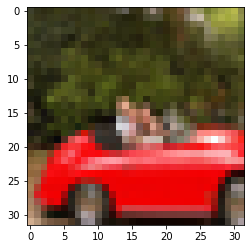

In [ ]:
plt.imshow(img)
plt.show()

### Preprocess Data

#### Just understand translation from Numpy to Tensor Data Structures

In [ ]:
to_tensor = transforms.ToTensor()

In [ ]:
img_t = to_tensor(img)
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [ ]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
    transform=transforms.ToTensor())

In [ ]:
img_t, _ = tensor_cifar10[99]
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [ ]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

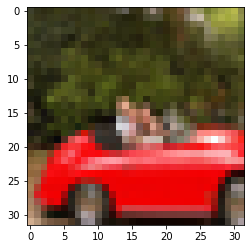

In [ ]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [ ]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)

In [ ]:
imgs.shape

torch.Size([3, 32, 32, 50000])

#### Convert to Tensor and Normalize Input Data Examples

In [ ]:
mean_by_channels = imgs.view(3, -1).mean(dim=1)
std_by_channels = imgs.view(3, -1).std(dim=1)

In [ ]:
normalize = transforms.Normalize(mean=mean_by_channels, std=std_by_channels)

In [ ]:
normalize

Normalize(mean=tensor([0.4915, 0.4823, 0.4468]), std=tensor([0.2470, 0.2435, 0.2616]))

In [ ]:
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
    transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=mean_by_channels, std=std_by_channels)
            ]
        )
    )

In [ ]:
transformed_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
    transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=mean_by_channels, std=std_by_channels)
            ]
        )
    )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


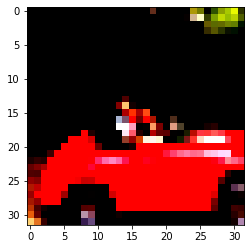

In [ ]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

### Builidng CIFAR-2 made out of just Bird and Airplane examples

In [ ]:
label_map = {class_names_reverse['airplane']: 0, class_names_reverse['bird']: 1}
class_names = ['airplane', 'bird']

cifar2 = [
          (img, label_map[label])
          for img, label in transformed_cifar10
          if label in [0, 2]
]

cifar2_val = [
          (img, label_map[label])
          for img, label in transformed_cifar10_val
          if label in [0, 2]
]

In [ ]:
n_out = 2

model = nn.Sequential(
    nn.Linear(3072, 512), nn.Tanh(),
    nn.Linear(512, n_out), nn.Softmax(dim=1)
)

In [ ]:
model

Sequential(
  (0): Linear(in_features=3072, out_features=512, bias=True)
  (1): Tanh()
  (2): Linear(in_features=512, out_features=2, bias=True)
  (3): Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


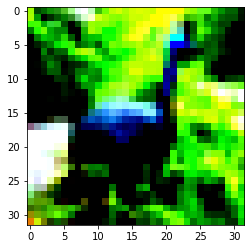

In [ ]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [ ]:
img_batch = img.view(-1).unsqueeze(0)

out = model(img_batch)
out

tensor([[0.5384, 0.4616]], grad_fn=<SoftmaxBackward>)

In [ ]:
_, index = torch.max(out, dim = 1)
index, class_names[index]

(tensor([0]), 'airplane')

## Perform Training Loop w/ nn.Sequential-like Instance

### LogSoftmax instead of Softmax - Test w/Modular Pytorch API

In [ ]:
model = nn.Sequential(
    nn.Linear(3072, 512), nn.Tanh(),
    nn.Linear(512, 2), nn.LogSoftmax(dim=1)
)

In [ ]:
model

Sequential(
  (0): Linear(in_features=3072, out_features=512, bias=True)
  (1): Tanh()
  (2): Linear(in_features=512, out_features=2, bias=True)
  (3): LogSoftmax(dim=1)
)

In [ ]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [ ]:
loss = nn.NLLLoss()

In [ ]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.5532, grad_fn=<NllLossBackward>)

In [ ]:
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
n_epochs = 100

In [ ]:
# training_loop(model, loss, optimizer)

### Minibatch Strategy for Updating in a wiser way Model's Parameters

In [ ]:
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss = nn.NLLLoss()

train_loader = torch.utils.data.DataLoader(
    cifar2, batch_size = 64, shuffle = True
)

val_loader = torch.utils.data.DataLoader(
    cifar2_val, batch_size = 64, shuffle = False
)

### Somewhat Arbitrarily Deeper Model - LogSoftmax + NLLLoss - Test w/ Modular Pytorch API

In [ ]:
model = nn.Sequential(
    nn.Linear(3072, 1024), nn.Tanh(),
    nn.Linear(1024, 512), nn.Tanh(),
    nn.Linear(512, 128), nn.Tanh(),
    nn.Linear(128, 2), nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss = nn.NLLLoss()

train_loader = torch.utils.data.DataLoader(
    cifar2, batch_size = 64, shuffle = True
)

val_loader = torch.utils.data.DataLoader(
    cifar2_val, batch_size = 64, shuffle = False
)

In [ ]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]

In [ ]:
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [ ]:
# batched_training_loop(model, loss, optimizer, train_loader, val_loader)

### Somewhat Arbitrarily Deeper Model - CrossEntropyLoss - Test w/ Modular Pytorch API

In [ ]:
model = nn.Sequential(
    nn.Linear(3072, 1024), nn.Tanh(),
    nn.Linear(1024, 512), nn.Tanh(),
    nn.Linear(512, 128), nn.Tanh(),
    nn.Linear(128, 2)
)

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(
    cifar2, batch_size = 64, shuffle = True
)

val_loader = torch.utils.data.DataLoader(
    cifar2_val, batch_size = 64, shuffle = False
)

In [ ]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]

In [ ]:
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [ ]:
# batched_training_loop(model, loss, optimizer, train_loader, val_loader)

In [ ]:
# data_path = '/content/'
# torch.save(model.state_dict(), data_path + 'fc_birds_vs_airplane.pt')

### Convolutional Neural Network Example - Modular Pytorch API

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size = 3, padding = 1), nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, kernel_size = 3, padding = 1), nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(8 * 8 * 8, 32), nn.Tanh(),
    nn.Linear(32, 2)
)

n_epochs = 100
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(
    cifar2, batch_size = 64, shuffle = True
)

val_loader = torch.utils.data.DataLoader(
    cifar2_val, batch_size = 64, shuffle = False
)

In [ ]:
model

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Tanh()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): Tanh()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten()
  (7): Linear(in_features=512, out_features=32, bias=True)
  (8): Tanh()
  (9): Linear(in_features=32, out_features=2, bias=True)
)

In [ ]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]

In [ ]:
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [ ]:
# batched_convnet_training_loop(model.to(device = device), loss, optimizer, train_loader, val_loader)

In [ ]:
# data_path = '/content/'
# torch.save(model.state_dict(), data_path + 'convnet_birds_vs_airplane.pt')

In [ ]:
"""loaded_model = model.load_state_dict(
    torch.load(
        data_path + 'convnet_birds_vs_airplane.pt',
        map_location = device
    )
)
"""

"loaded_model = model.load_state_dict(\n    torch.load(\n        data_path + 'convnet_birds_vs_airplane.pt',\n        map_location = device\n    )\n)\n"

## Perform Training Loop w/ subclassing nn.Module

### Training by means of an instance of subclassed nn.Module Net class

In [ ]:
model = Net()

n_epochs = 100
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(
    cifar2, batch_size = 64, shuffle = True
)

val_loader = torch.utils.data.DataLoader(
    cifar2_val, batch_size = 64, shuffle = False
)

In [ ]:
model

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act1): Tanh()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act2): Tanh()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=32, bias=True)
  (act3): Tanh()
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

In [ ]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [ ]:
batched_convnet_training_loop(model.to(device = device), loss, optimizer, train_loader, val_loader)

2020-09-27 12:46:33.693786 Epoch: 1, Trainin Loss: 0.46000 Accuracy train: 0.77140 Accuracy val: 0.78150
2020-09-27 12:46:34.694737 Epoch: 2, Trainin Loss: 0.38923 Accuracy train: 0.78570 Accuracy val: 0.80300
2020-09-27 12:46:35.693035 Epoch: 3, Trainin Loss: 0.35483 Accuracy train: 0.79960 Accuracy val: 0.81200
2020-09-27 12:46:36.701816 Epoch: 4, Trainin Loss: 0.32905 Accuracy train: 0.80820 Accuracy val: 0.82100
2020-09-27 12:46:37.695642 Epoch: 5, Trainin Loss: 0.48191 Accuracy train: 0.82660 Accuracy val: 0.82750
2020-09-27 12:46:38.696044 Epoch: 6, Trainin Loss: 0.42500 Accuracy train: 0.83170 Accuracy val: 0.83350
2020-09-27 12:46:39.715881 Epoch: 7, Trainin Loss: 0.33206 Accuracy train: 0.84450 Accuracy val: 0.84100
2020-09-27 12:46:40.723368 Epoch: 8, Trainin Loss: 0.59311 Accuracy train: 0.85200 Accuracy val: 0.84000
2020-09-27 12:46:41.729142 Epoch: 9, Trainin Loss: 0.58132 Accuracy train: 0.84850 Accuracy val: 0.84350
2020-09-27 12:46:42.732085 Epoch: 10, Trainin Loss: 0.2

In [ ]:
data_path = '/content/'
torch.save(model.state_dict(), data_path + 'Net_birds_vs_airplane.pt')

In [ ]:
# data_path = '/content/'
# torch.save(model.state_dict(), data_path + 'Net_birds_vs_airplane.pt')

### Setting Width of first Conv Layer via an instance of NetWidth Class w/ Functional API exploited for Pool Layer

In [ ]:
model = NetWidth()

n_epochs = 100
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(
    cifar2, batch_size = 64, shuffle = True
)

val_loader = torch.utils.data.DataLoader(
    cifar2_val, batch_size = 64, shuffle = False
)

In [ ]:
model

NetWidth(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

In [ ]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(38386, [864, 32, 4608, 16, 32768, 32, 64, 2])

In [ ]:
batched_convnet_training_loop(model.to(device = device), loss, optimizer, train_loader, val_loader)

2020-09-27 12:48:14.426536 Epoch: 1, Trainin Loss: 0.61545 Accuracy train: 0.78270 Accuracy val: 0.79000
2020-09-27 12:48:15.570275 Epoch: 2, Trainin Loss: 0.47434 Accuracy train: 0.79840 Accuracy val: 0.80650
2020-09-27 12:48:16.715613 Epoch: 3, Trainin Loss: 0.36708 Accuracy train: 0.80960 Accuracy val: 0.81300
2020-09-27 12:48:17.854553 Epoch: 4, Trainin Loss: 0.41275 Accuracy train: 0.83520 Accuracy val: 0.82950
2020-09-27 12:48:19.000445 Epoch: 5, Trainin Loss: 0.42313 Accuracy train: 0.84630 Accuracy val: 0.83650
2020-09-27 12:48:20.149989 Epoch: 6, Trainin Loss: 0.39545 Accuracy train: 0.85050 Accuracy val: 0.83850
2020-09-27 12:48:21.296088 Epoch: 7, Trainin Loss: 0.20841 Accuracy train: 0.85260 Accuracy val: 0.84350
2020-09-27 12:48:22.436530 Epoch: 8, Trainin Loss: 0.25730 Accuracy train: 0.85830 Accuracy val: 0.84000
2020-09-27 12:48:23.589588 Epoch: 9, Trainin Loss: 0.47417 Accuracy train: 0.86350 Accuracy val: 0.84400
2020-09-27 12:48:24.727997 Epoch: 10, Trainin Loss: 0.1

In [ ]:
data_path = '/content/'
torch.save(model.state_dict(), data_path + 'NetWidth_birds_vs_airplane.pt')

In [ ]:
# data_path = '/content/'
# torch.save(model.state_dict(), data_path + 'NetWidth_birds_vs_airplane.pt')

### BatchNorm Network Model

In [ ]:
model = NetBatchNorm()

n_epochs = 100
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(
    cifar2, batch_size = 64, shuffle = True
)

val_loader = torch.utils.data.DataLoader(
    cifar2_val, batch_size = 64, shuffle = False
)

In [ ]:
model

NetBatchNorm(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_batchnorm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_batchnorm): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1024, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

In [ ]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(38482, [864, 32, 32, 32, 4608, 16, 16, 16, 32768, 32, 64, 2])

In [ ]:
batched_convnet_training_loop(model.to(device = device), loss, optimizer, train_loader, val_loader)

2020-09-27 12:50:09.191545 Epoch: 1, Trainin Loss: 0.31038 Accuracy train: 0.82830 Accuracy val: 0.83000
2020-09-27 12:50:10.476591 Epoch: 2, Trainin Loss: 0.34808 Accuracy train: 0.84130 Accuracy val: 0.84450
2020-09-27 12:50:11.756672 Epoch: 3, Trainin Loss: 0.33030 Accuracy train: 0.84660 Accuracy val: 0.83300
2020-09-27 12:50:13.044131 Epoch: 4, Trainin Loss: 0.21864 Accuracy train: 0.85660 Accuracy val: 0.85900
2020-09-27 12:50:14.336110 Epoch: 5, Trainin Loss: 0.38716 Accuracy train: 0.86700 Accuracy val: 0.85650
2020-09-27 12:50:15.628518 Epoch: 6, Trainin Loss: 0.22246 Accuracy train: 0.86610 Accuracy val: 0.86700
2020-09-27 12:50:16.906988 Epoch: 7, Trainin Loss: 0.25192 Accuracy train: 0.86390 Accuracy val: 0.85450
2020-09-27 12:50:18.199515 Epoch: 8, Trainin Loss: 0.36261 Accuracy train: 0.83610 Accuracy val: 0.81550
2020-09-27 12:50:19.483882 Epoch: 9, Trainin Loss: 0.22106 Accuracy train: 0.88600 Accuracy val: 0.86200
2020-09-27 12:50:20.766013 Epoch: 10, Trainin Loss: 0.2

In [ ]:
data_path = '/content/'
torch.save(model.state_dict(), data_path + 'NetBatchNorm_birds_vs_airplane.pt')

In [ ]:
# data_path = '/content/'
# torch.save(model.state_dict(), data_path + 'NetBatchNorm_birds_vs_airplane.pt')

In [ ]:
model = NetDepth()

n_epochs = 100
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(
    cifar2, batch_size = 64, shuffle = True
)

val_loader = torch.utils.data.DataLoader(
    cifar2_val, batch_size = 64, shuffle = False
)

In [ ]:
model

NetDepth(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=256, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

In [ ]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(16130, [864, 32, 4608, 16, 2304, 16, 8192, 32, 64, 2])

In [ ]:
batched_convnet_training_loop(model.to(device = device), loss, optimizer, train_loader, val_loader)

2020-09-27 12:52:17.839012 Epoch: 1, Trainin Loss: 0.67686 Accuracy train: 0.65830 Accuracy val: 0.66250
2020-09-27 12:52:19.210456 Epoch: 2, Trainin Loss: 0.48574 Accuracy train: 0.74900 Accuracy val: 0.75800
2020-09-27 12:52:20.576214 Epoch: 3, Trainin Loss: 0.46508 Accuracy train: 0.76530 Accuracy val: 0.77200
2020-09-27 12:52:21.943077 Epoch: 4, Trainin Loss: 0.31254 Accuracy train: 0.81510 Accuracy val: 0.81400
2020-09-27 12:52:23.311524 Epoch: 5, Trainin Loss: 0.39935 Accuracy train: 0.78520 Accuracy val: 0.78800
2020-09-27 12:52:24.673420 Epoch: 6, Trainin Loss: 0.44025 Accuracy train: 0.72930 Accuracy val: 0.72750
2020-09-27 12:52:26.039206 Epoch: 7, Trainin Loss: 0.25971 Accuracy train: 0.81980 Accuracy val: 0.82350
2020-09-27 12:52:27.401646 Epoch: 8, Trainin Loss: 0.26750 Accuracy train: 0.84580 Accuracy val: 0.83850
2020-09-27 12:52:28.767675 Epoch: 9, Trainin Loss: 0.50860 Accuracy train: 0.79250 Accuracy val: 0.79750
2020-09-27 12:52:30.132321 Epoch: 10, Trainin Loss: 0.4

In [ ]:
data_path = '/content/'
torch.save(model.state_dict(), data_path + 'NetDepth_birds_vs_airplane.pt')

In [ ]:
# data_path = '/content/'
# torch.save(model.state_dict(), data_path + 'NetDepth_birds_vs_airplane.pt')

## Perform Training Loop w/ subclassing nn.Module + L2 or L1 or Both Regularizations

In [ ]:
model = NetBatchNorm()

n_epochs = 100
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(
    cifar2, batch_size = 64, shuffle = True
)

val_loader = torch.utils.data.DataLoader(
    cifar2_val, batch_size = 64, shuffle = False
)

In [ ]:
model

NetBatchNorm(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_batchnorm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_batchnorm): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1024, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

In [ ]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(38482, [864, 32, 32, 32, 4608, 16, 16, 16, 32768, 32, 64, 2])

In [ ]:
l2_reg_batched_convnet_training_loop(model.to(device = device), loss, optimizer, train_loader, val_loader)

2020-09-27 12:54:35.173028 Epoch: 1, Trainin Loss: 0.46052 Accuracy train: 0.82620 Accuracy val: 0.82050
2020-09-27 12:54:36.796161 Epoch: 2, Trainin Loss: 0.25513 Accuracy train: 0.84500 Accuracy val: 0.83200
2020-09-27 12:54:38.419471 Epoch: 3, Trainin Loss: 0.18011 Accuracy train: 0.84680 Accuracy val: 0.83050
2020-09-27 12:54:40.031936 Epoch: 4, Trainin Loss: 0.33627 Accuracy train: 0.85990 Accuracy val: 0.85200
2020-09-27 12:54:41.653520 Epoch: 5, Trainin Loss: 0.40905 Accuracy train: 0.87010 Accuracy val: 0.85350
2020-09-27 12:54:43.269698 Epoch: 6, Trainin Loss: 0.36559 Accuracy train: 0.86520 Accuracy val: 0.86550
2020-09-27 12:54:44.898102 Epoch: 7, Trainin Loss: 0.41334 Accuracy train: 0.87310 Accuracy val: 0.86400
2020-09-27 12:54:46.523676 Epoch: 8, Trainin Loss: 0.33587 Accuracy train: 0.87860 Accuracy val: 0.86150
2020-09-27 12:54:48.145014 Epoch: 9, Trainin Loss: 0.10226 Accuracy train: 0.88940 Accuracy val: 0.87250
2020-09-27 12:54:49.769606 Epoch: 10, Trainin Loss: 0.4

In [ ]:
data_path = '/content/'
torch.save(model.state_dict(), data_path + 'NetBatchNorm_l2_norm_birds_vs_airplane.pt')

In [ ]:
# data_path = '/content/'
# torch.save(model.state_dict(), data_path + 'NetBatchNorm_l2_norm_birds_vs_airplane.pt')

In [ ]:
model = NetBatchNorm()

n_epochs = 100
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(
    cifar2, batch_size = 64, shuffle = True
)

val_loader = torch.utils.data.DataLoader(
    cifar2_val, batch_size = 64, shuffle = False
)

In [ ]:
l1_reg_batched_convnet_training_loop(model.to(device = device), loss, optimizer, train_loader, val_loader)

2020-09-27 12:57:17.244141 Epoch: 1, Trainin Loss: 1.12505 Accuracy train: 0.82200 Accuracy val: 0.82650
2020-09-27 12:57:18.767728 Epoch: 2, Trainin Loss: 1.14112 Accuracy train: 0.83610 Accuracy val: 0.83500
2020-09-27 12:57:20.298483 Epoch: 3, Trainin Loss: 1.03120 Accuracy train: 0.83890 Accuracy val: 0.83500
2020-09-27 12:57:21.818882 Epoch: 4, Trainin Loss: 0.86870 Accuracy train: 0.86360 Accuracy val: 0.85300
2020-09-27 12:57:23.347770 Epoch: 5, Trainin Loss: 0.96213 Accuracy train: 0.85830 Accuracy val: 0.85650
2020-09-27 12:57:24.876524 Epoch: 6, Trainin Loss: 0.92415 Accuracy train: 0.86610 Accuracy val: 0.84100
2020-09-27 12:57:26.400898 Epoch: 7, Trainin Loss: 1.03559 Accuracy train: 0.86490 Accuracy val: 0.86600
2020-09-27 12:57:27.925949 Epoch: 8, Trainin Loss: 0.84257 Accuracy train: 0.85520 Accuracy val: 0.85050
2020-09-27 12:57:29.462961 Epoch: 9, Trainin Loss: 0.68387 Accuracy train: 0.87700 Accuracy val: 0.87450
2020-09-27 12:57:30.982781 Epoch: 10, Trainin Loss: 0.6

In [ ]:
model = NetBatchNorm()

n_epochs = 100
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(
    cifar2, batch_size = 64, shuffle = True
)

val_loader = torch.utils.data.DataLoader(
    cifar2_val, batch_size = 64, shuffle = False
)

In [ ]:
l1l2_reg_batched_convnet_training_loop(model.to(device = device), loss, optimizer, train_loader, val_loader)

2020-09-27 12:59:50.134550 Epoch: 1, Trainin Loss: 1.15520 Accuracy train: 0.83380 Accuracy val: 0.83400
2020-09-27 12:59:52.005043 Epoch: 2, Trainin Loss: 0.96265 Accuracy train: 0.84990 Accuracy val: 0.84500
2020-09-27 12:59:53.856942 Epoch: 3, Trainin Loss: 1.02143 Accuracy train: 0.84750 Accuracy val: 0.83600
2020-09-27 12:59:55.715170 Epoch: 4, Trainin Loss: 1.22355 Accuracy train: 0.84160 Accuracy val: 0.83550
2020-09-27 12:59:57.557948 Epoch: 5, Trainin Loss: 0.94101 Accuracy train: 0.84640 Accuracy val: 0.85500
2020-09-27 12:59:59.415697 Epoch: 6, Trainin Loss: 0.82718 Accuracy train: 0.84610 Accuracy val: 0.85100
2020-09-27 13:00:01.285933 Epoch: 7, Trainin Loss: 0.97372 Accuracy train: 0.82850 Accuracy val: 0.81450
2020-09-27 13:00:03.119094 Epoch: 8, Trainin Loss: 1.07134 Accuracy train: 0.84500 Accuracy val: 0.83200
2020-09-27 13:00:04.974150 Epoch: 9, Trainin Loss: 0.68900 Accuracy train: 0.86640 Accuracy val: 0.85800
2020-09-27 13:00:06.824434 Epoch: 10, Trainin Loss: 0.6

## ResNet-like NN model - *Test*

In [ ]:
model = NetResDeep()

n_epochs = 100
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(
    cifar2, batch_size = 64, shuffle = True
)

val_loader = torch.utils.data.DataLoader(
    cifar2_val, batch_size = 64, shuffle = False
)

In [ ]:
model

NetResDeep(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (resblocks): Sequential(
    (0): ResBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): ResBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): ResBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (4): ResBlock

In [ ]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(75810, [864, 32, 9216, 32, 32, 65536, 32, 64, 2])

In [ ]:
batched_convnet_training_loop(model.to(device = device), loss, optimizer, train_loader, val_loader)

2020-09-27 13:02:58.498256 Epoch: 1, Trainin Loss: 0.14855 Accuracy train: 0.50200 Accuracy val: 0.50300
2020-09-27 13:03:03.231297 Epoch: 2, Trainin Loss: 0.12685 Accuracy train: 0.50070 Accuracy val: 0.50000
2020-09-27 13:03:07.960182 Epoch: 3, Trainin Loss: 0.27534 Accuracy train: 0.58940 Accuracy val: 0.59250
2020-09-27 13:03:12.693694 Epoch: 4, Trainin Loss: 0.37004 Accuracy train: 0.65660 Accuracy val: 0.65950
2020-09-27 13:03:17.423534 Epoch: 5, Trainin Loss: 0.36202 Accuracy train: 0.81760 Accuracy val: 0.81850
2020-09-27 13:03:22.163156 Epoch: 6, Trainin Loss: 0.45932 Accuracy train: 0.56580 Accuracy val: 0.56950
2020-09-27 13:03:26.892394 Epoch: 7, Trainin Loss: 0.46918 Accuracy train: 0.83480 Accuracy val: 0.83100
2020-09-27 13:03:31.623207 Epoch: 8, Trainin Loss: 0.30491 Accuracy train: 0.82600 Accuracy val: 0.82600
2020-09-27 13:03:36.353863 Epoch: 9, Trainin Loss: 0.18666 Accuracy train: 0.74550 Accuracy val: 0.74350
2020-09-27 13:03:41.082777 Epoch: 10, Trainin Loss: 0.0

In [ ]:
data_path = '/content/'
torch.save(model.state_dict(), data_path + 'ResNet_norm_batchnorm_birds_vs_airplane.pt')

In [ ]:
# data_path = '/content/'
# torch.save(model.state_dict(), data_path + 'ResNet_norm_batchnorm_birds_vs_airplane.pt')

In [ ]:
torch.cuda.device_count()

1

In [ ]:
torch.cuda.current_device()

0

## References

- Pytorch Reference's Manual:
 - [torch.nn module](https://pytorch.org/docs/stable/nn.html)

- Initialization Topic (Papers):
  - [Understanding the difficulty of training deep feedforward neural networks](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf) by X. Glorot & Y.Bengio, which lead to default Pytorch's weights initialization knwon as *Xavier initialization* algorithm or scheme
 -  [Fixup Initialization: Residual Learning Without Normalization](https://arxiv.org/abs/1901.09321) by Hongyi Zhang, Yann N. Dauphin, Tengyu Ma, whose works allows to *get rid off batch normalization layers* with a given particular NN Arch, to still be able to train a NN arch with meaningful and confident results or performance.

- Activation Functions (Papers):
  - [Deep Learning using Rectified Linear Units (ReLU)](https://arxiv.org/pdf/1803.08375.pdf)

- Datasets:
  - [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

- Regularization techniques (Papers):
  - [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shif](https://arxiv.org/abs/1502.03167)
  - [Dropout: A Simple Way to Prevent Neural Networks from
Overfitting](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf)

- Archs Types (Papers):
  - [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)
  - [Densely Connected Convolutional Networks](https://arxiv.org/abs/1608.06993)
  - [Highway Networks
](https://arxiv.org/pdf/1505.00387.pdf)
  - [U-Net: Convolutional Networks for Biomedical Image Segmentation](https://arxiv.org/abs/1505.04597)

- Some Third Party useful Tutorials:
 - [Imagenet example](https://github.com/pytorch/examples/blob/master/imagenet/main.py#L327)
 - [Writing a better code with pytorch and einops](https://arogozhnikov.github.io/einops/pytorch-examples.html)

- Books
  - [List of books for improving Pytorch knowledge](https://bookauthority.org/books/best-pytorch-books)